## Case-study: Anamoly Detection from the IoT Data

**Objective:** Real-time detection of anomalous energy usage patterns in radiators or HVAC systems in elderly care facilities to minimize inefficiencies and preempt faults.

### Step: 01 - Data Understanding and Pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("Smart_Heating_Sensor_Dataset.csv")

In [3]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        200 non-null    object 
 1   room_id          200 non-null    object 
 2   outside_temp_c   200 non-null    float64
 3   set_temp_c       200 non-null    int64  
 4   actual_temp_c    200 non-null    float64
 5   heating_status   200 non-null    int64  
 6   occupancy        200 non-null    int64  
 7   energy_kwh       200 non-null    float64
 8   temp_diff        200 non-null    float64
 9   efficiency_flag  200 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 15.8+ KB


In [4]:
df.head()

,timestamp,room_id,outside_temp_c,set_temp_c,actual_temp_c,heating_status,occupancy,energy_kwh,temp_diff,efficiency_flag
0,2025-05-01 00:00:00,Room_103,17.930084,21,20.777157,0,1,0.000000,0.222843,0
1,2025-05-01 01:00:00,Room_104,3.810923,20,24.985999,0,1,0.000000,-4.985999,1
2,2025-05-01 02:00:00,Room_101,20.665167,21,19.987858,1,1,1.362273,1.012142,0
3,2025-05-01 03:00:00,Room_103,0.239561,20,21.676982,0,0,0.000000,-1.676982,0
4,2025-05-01 04:00:00,Room_103,9.241075,22,20.163659,0,1,0.000000,1.836341,0


In [5]:
df.describe()

,outside_temp_c,set_temp_c,actual_temp_c,heating_status,occupancy,energy_kwh,temp_diff,efficiency_flag
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.276425,21.540000,20.178036,0.550000,0.730000,0.837791,1.361964,0.465000
std,4.855275,1.106581,1.938087,0.498742,0.445074,0.792063,2.166725,0.500025
min,-1.509606,20.000000,14.817915,0.000000,0.000000,0.000000,-5.203366,0.000000
25%,7.003103,21.000000,18.822576,0.000000,0.000000,0.000000,0.045469,0.000000
50%,10.083991,22.000000,20.121488,1.000000,1.000000,1.150291,1.319047,0.000000
75%,13.414888,23.000000,21.439621,1.000000,1.000000,1.549450,2.886121,1.000000
max,25.394404,23.000000,25.203366,1.000000,1.000000,2.360521,7.107842,1.000000


In [6]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
print(df.columns.tolist())

['timestamp', 'room_id', 'outside_temp_c', 'set_temp_c', 'actual_temp_c', 'heating_status', 'occupancy', 'energy_kwh', 'temp_diff', 'efficiency_flag']


In [8]:
# Check for missing values
print(df.isnull().sum())

timestamp          0
room_id            0
outside_temp_c     0
set_temp_c         0
actual_temp_c      0
heating_status     0
occupancy          0
energy_kwh         0
temp_diff          0
efficiency_flag    0
dtype: int64


In [9]:
# Check data types
print(df.dtypes)

timestamp          datetime64[ns]
room_id                    object
outside_temp_c            float64
set_temp_c                  int64
actual_temp_c             float64
heating_status              int64
occupancy                   int64
energy_kwh                float64
temp_diff                 float64
efficiency_flag             int64
dtype: object


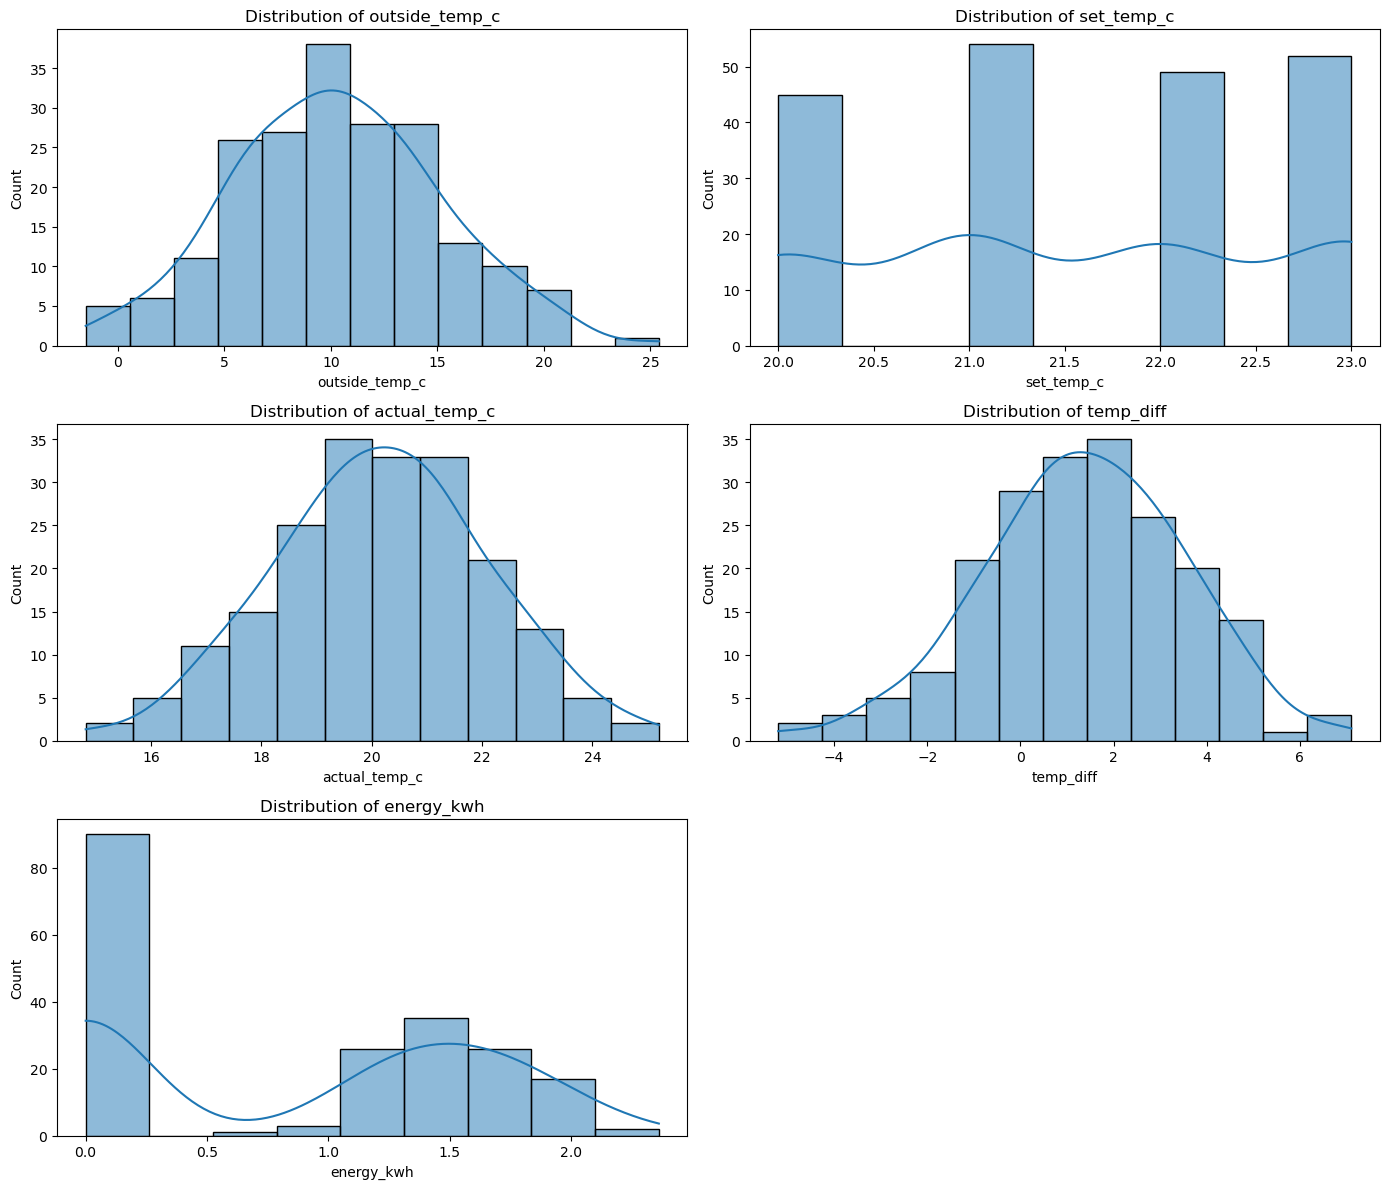

In [10]:
# Distribution plots for numerical features
numerical_cols = ['outside_temp_c', 'set_temp_c', 'actual_temp_c', 'temp_diff', 'energy_kwh']
# for col in numerical_cols:
#     plt.figure(figsize=(6, 4))
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.show()
# Create a 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Turn off the last unused subplot
axes[-1].axis('off')

# Improve spacing
plt.tight_layout()
plt.show()


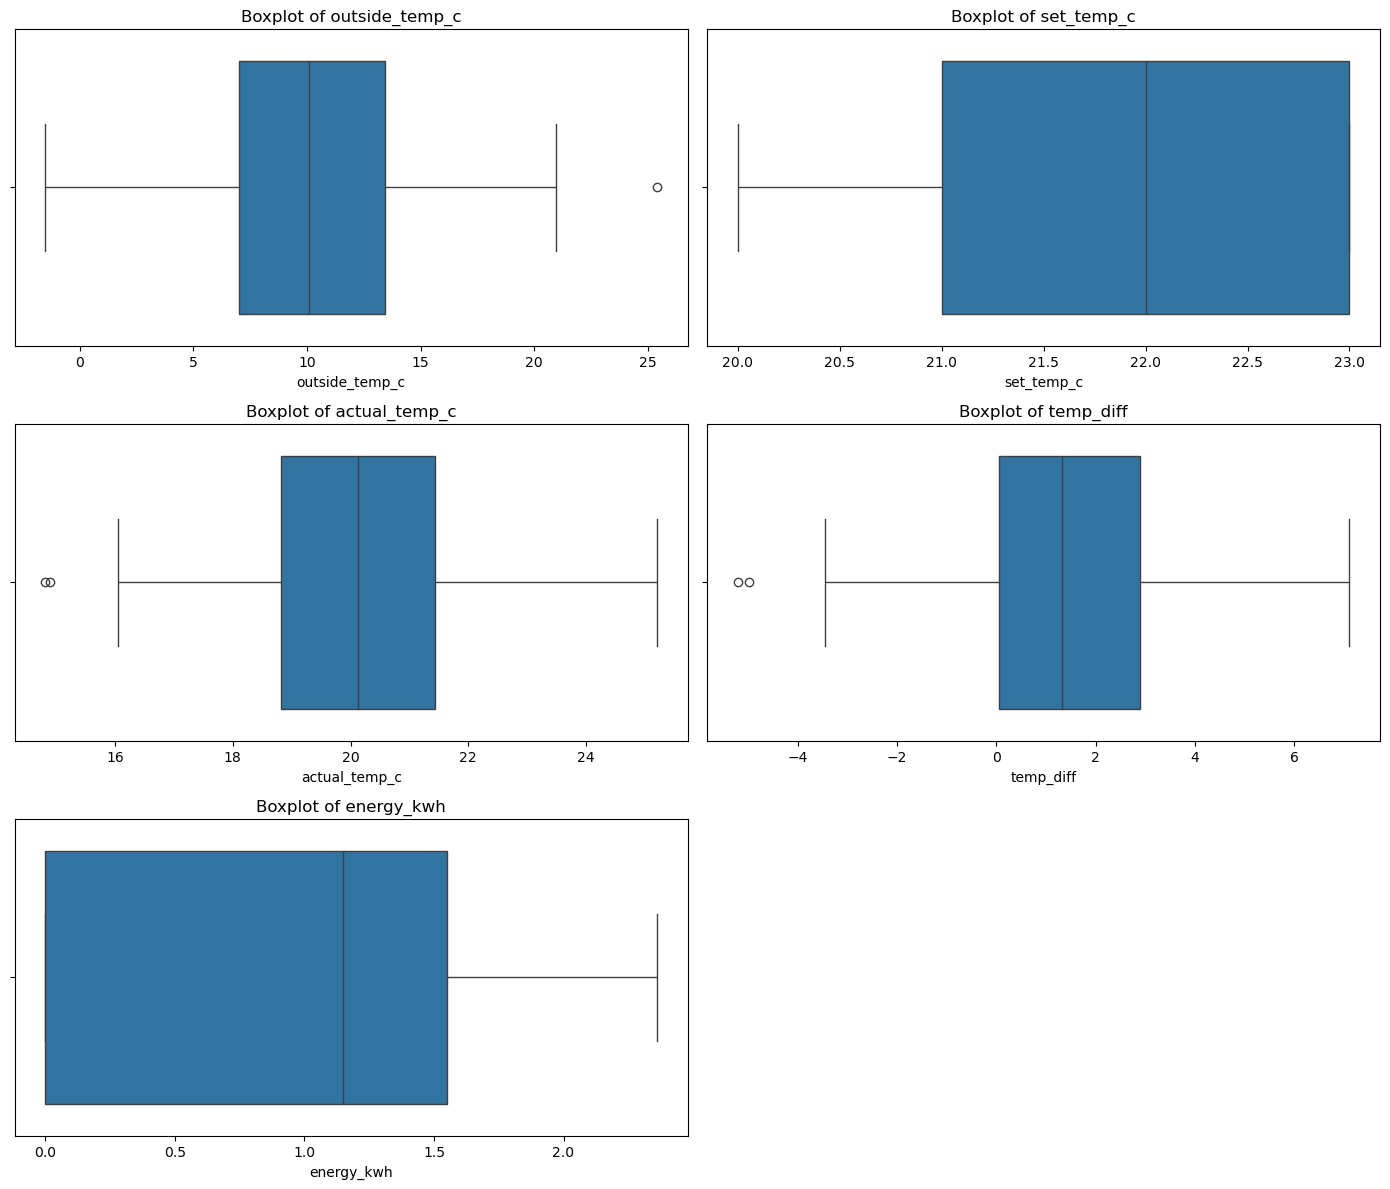

In [11]:
# Create a 3x2 grid for boxplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

# Plot boxplots in the grid
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Turn off the last unused subplot
axes[-1].axis('off')

# Improve spacing
plt.tight_layout()
plt.show()

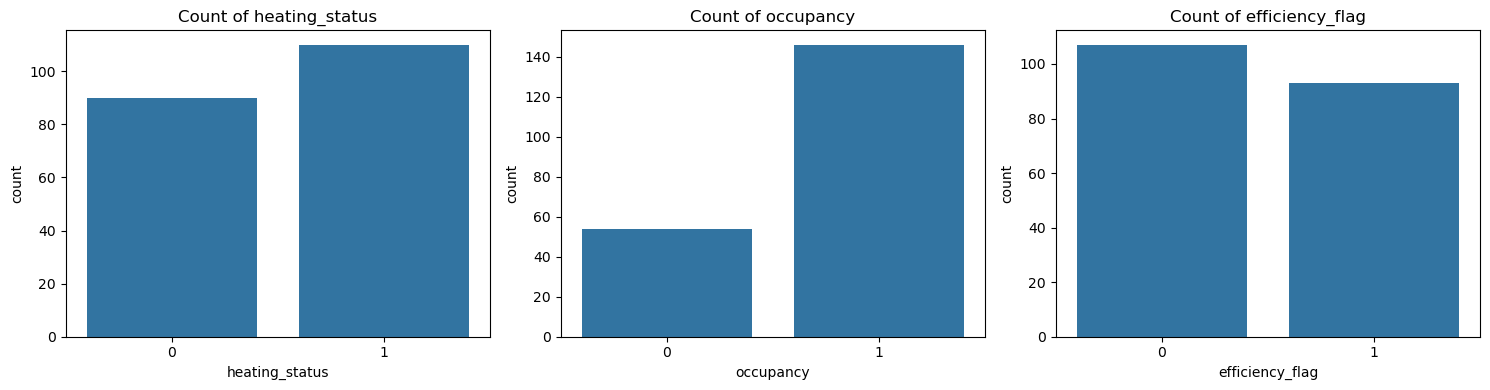

In [12]:
# Create a 1x3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot each categorical feature
categorical_cols = ['heating_status', 'occupancy', 'efficiency_flag']
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {col}')

plt.tight_layout()
plt.show()

In [13]:
# TODO: Enhance efficiency_flag logic by combining multiple criteria such as:
# 1. High absolute temp_diff (>2°C)
# 2. Heater ON while room is unoccupied
# 3. Heater ON but temperature not rising (ineffective heating)
# This will help build a smarter anomaly detection system later


### STEP 2: Exploratory Data Analysis (EDA)

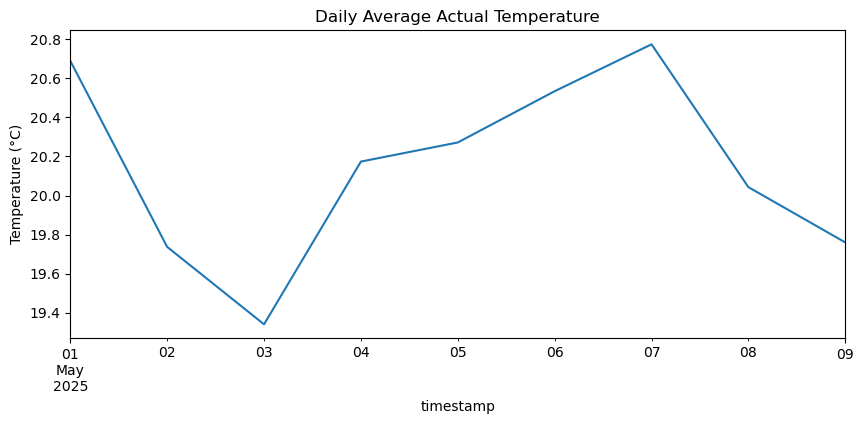

In [14]:
# 1. Time-based trends: average actual temperature over time
df.set_index('timestamp', inplace=True)
df['actual_temp_c'].resample('D').mean().plot(figsize=(10, 4), title='Daily Average Actual Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

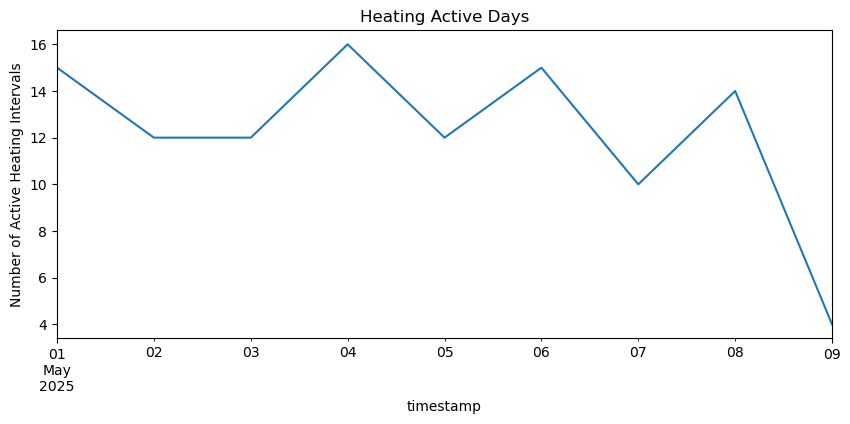

In [15]:
# 2. Heating status over time
df['heating_status'].resample('D').sum().plot(figsize=(10, 4), title='Heating Active Days')
plt.ylabel('Number of Active Heating Intervals')
plt.show()

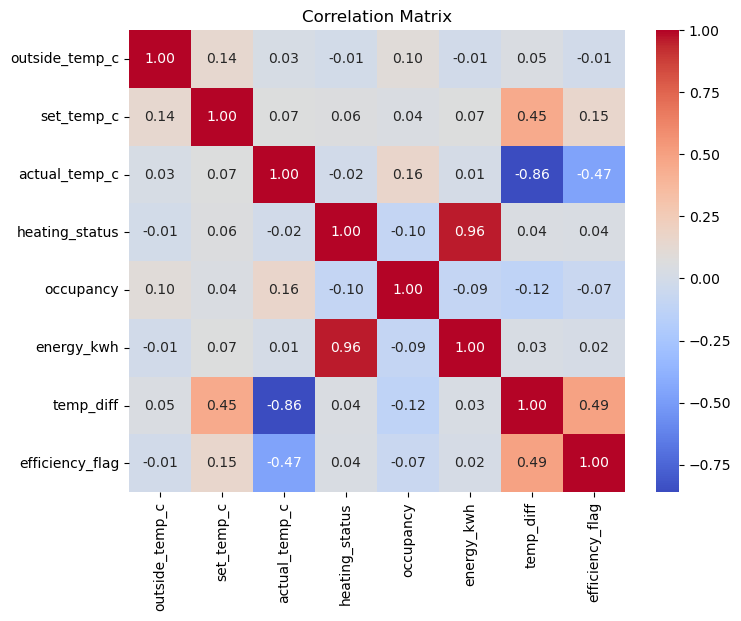

In [16]:
# 3. Correlation heatmap for numerical features (exclude non-numeric)
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

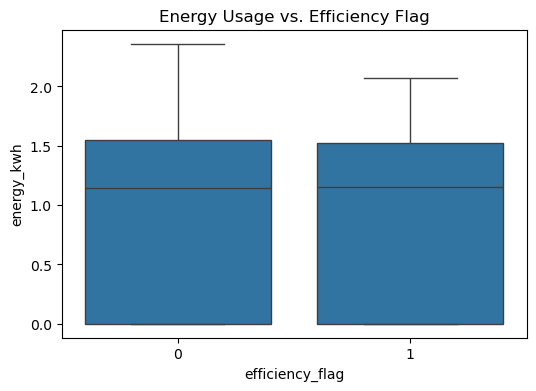

In [17]:
# 4. Boxplot of energy usage across efficiency flags
plt.figure(figsize=(6, 4))
sns.boxplot(x='efficiency_flag', y='energy_kwh', data=df)
plt.title('Energy Usage vs. Efficiency Flag')
plt.show()

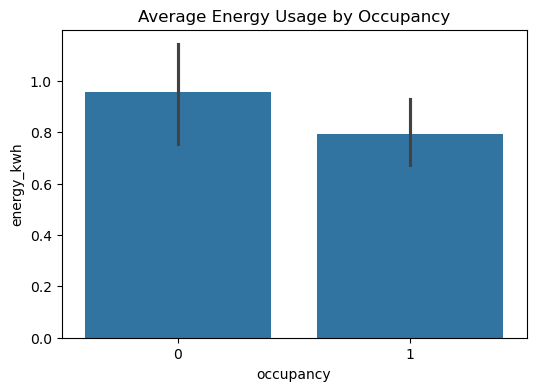

In [18]:
# 5. Average energy usage per occupancy state
plt.figure(figsize=(6, 4))
sns.barplot(x='occupancy', y='energy_kwh', data=df)
plt.title('Average Energy Usage by Occupancy')
plt.show()

### Step 3: Anomaly Detection Rules

In [19]:
# Rule 1: Inefficient if absolute temperature deviation is greater than 2°C
df['anomaly_temp_deviation'] = (df['temp_diff'].abs() > 2).astype(int)

In [20]:
# Rule 2: Inefficient if heating is ON and room is not occupied (wasted energy)
df['anomaly_heating_unoccupied'] = ((df['heating_status'] == 1) & (df['occupancy'] == 0)).astype(int)

In [21]:
# Rule 3: Inefficient if heater is ON but temp_diff is still > 2 (system not catching up)
df['anomaly_heating_ineffective'] = ((df['heating_status'] == 1) & (df['temp_diff'] > 2)).astype(int)

In [22]:
# Final anomaly flag: if any of the above conditions hold
df['anomaly_flag'] = (
    df['anomaly_temp_deviation'] |
    df['anomaly_heating_unoccupied'] |
    df['anomaly_heating_ineffective']
).astype(int)

In [23]:
# Summary: count of each type of anomaly
anomaly_summary = {
    "temp deviation only": df['anomaly_temp_deviation'].sum(),
    "heating while unoccupied": df['anomaly_heating_unoccupied'].sum(),
    "ineffective heating": df['anomaly_heating_ineffective'].sum(),
    "total flagged": df['anomaly_flag'].sum()
}

print(anomaly_summary)

{'temp deviation only': 93, 'heating while unoccupied': 34, 'ineffective heating': 47, 'total flagged': 109}


In [24]:
print(df.columns)

Index(['room_id', 'outside_temp_c', 'set_temp_c', 'actual_temp_c',
       'heating_status', 'occupancy', 'energy_kwh', 'temp_diff',
       'efficiency_flag', 'anomaly_temp_deviation',
       'anomaly_heating_unoccupied', 'anomaly_heating_ineffective',
       'anomaly_flag'],
      dtype='object')


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2025-05-01 00:00:00 to 2025-05-09 07:00:00
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_id                      200 non-null    object 
 1   outside_temp_c               200 non-null    float64
 2   set_temp_c                   200 non-null    int64  
 3   actual_temp_c                200 non-null    float64
 4   heating_status               200 non-null    int64  
 5   occupancy                    200 non-null    int64  
 6   energy_kwh                   200 non-null    float64
 7   temp_diff                    200 non-null    float64
 8   efficiency_flag              200 non-null    int64  
 9   anomaly_temp_deviation       200 non-null    int32  
 10  anomaly_heating_unoccupied   200 non-null    int32  
 11  anomaly_heating_ineffective  200 non-null    int32  
 12  anomaly_flag                 200 non-null

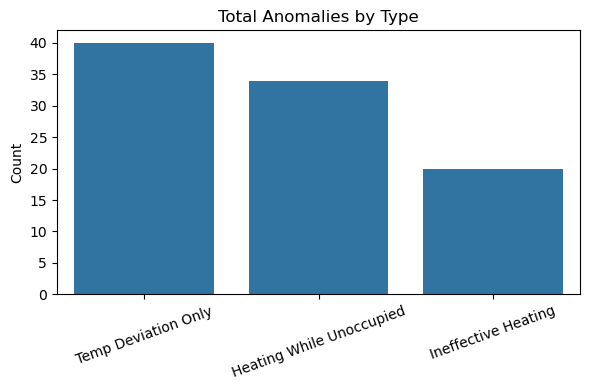

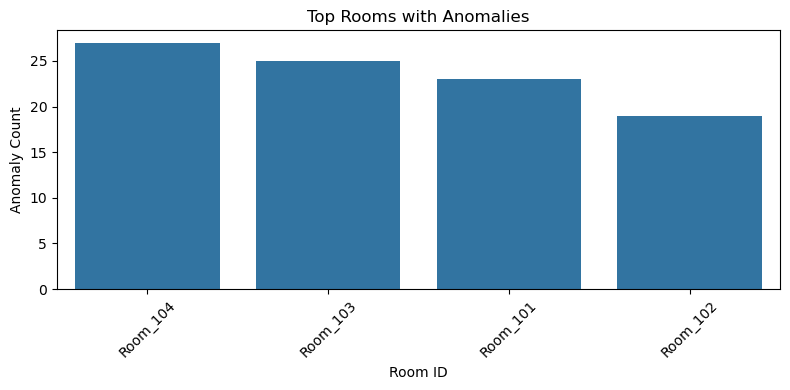

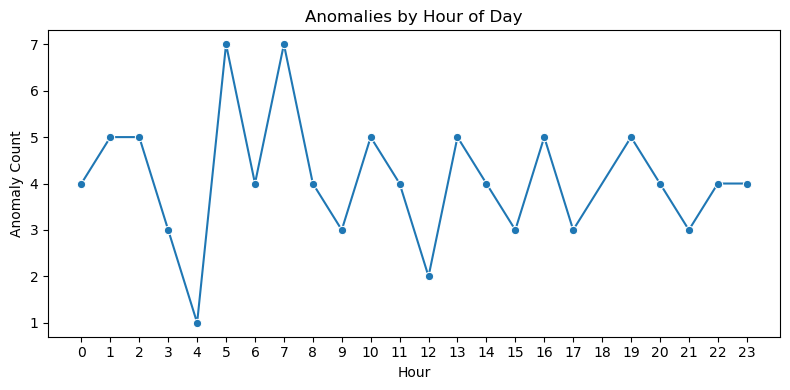

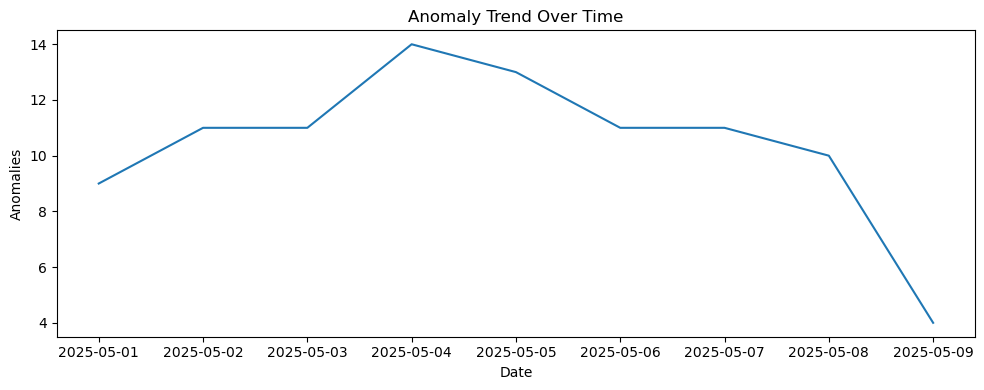

In [26]:
def classify_anomaly(row):
    if abs(row['temp_diff']) > 2 and row['heating_status'] == 0:
        return 'temp deviation only'
    elif row['heating_status'] == 1 and row['occupancy'] == 0:
        return 'heating while unoccupied'
    elif row['heating_status'] == 1 and row['temp_diff'] < 0:
        return 'ineffective heating'
    else:
        return 'none'

df['anomaly_type'] = df.apply(classify_anomaly, axis=1)

# Total anomalies by type
anomaly_counts = {
    'Temp Deviation Only': df['anomaly_type'].value_counts().get('temp deviation only', 0),
    'Heating While Unoccupied': df['anomaly_type'].value_counts().get('heating while unoccupied', 0),
    'Ineffective Heating': df['anomaly_type'].value_counts().get('ineffective heating', 0)
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(anomaly_counts.keys()), y=list(anomaly_counts.values()))
plt.title('Total Anomalies by Type')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Rooms with most issues
plt.figure(figsize=(8, 4))
room_issues = df[df['anomaly_type'] != 'none']['room_id'].value_counts().head(10)
sns.barplot(x=room_issues.index, y=room_issues.values)
plt.title('Top Rooms with Anomalies')
plt.ylabel('Anomaly Count')
plt.xlabel('Room ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Times with highest inefficiency
df.reset_index(inplace=True)
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
plt.figure(figsize=(8, 4))
hourly_issues = df[df['anomaly_type'] != 'none']['hour'].value_counts().sort_index()
sns.lineplot(x=hourly_issues.index, y=hourly_issues.values, marker='o')
plt.title('Anomalies by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Anomaly Count')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Weekly anomaly trend snapshot
df['date'] = pd.to_datetime(df['timestamp']).dt.date
weekly = df[df['anomaly_type'] != 'none'].groupby('date').size()

plt.figure(figsize=(10, 4))
weekly.plot()
plt.title('Anomaly Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Anomalies')
plt.tight_layout()
plt.show()

In [27]:
df.head()

,timestamp,room_id,outside_temp_c,set_temp_c,actual_temp_c,heating_status,occupancy,energy_kwh,temp_diff,efficiency_flag,anomaly_temp_deviation,anomaly_heating_unoccupied,anomaly_heating_ineffective,anomaly_flag,anomaly_type,hour,date
0,2025-05-01 00:00:00,Room_103,17.930084,21,20.777157,0,1,0.000000,0.222843,0,0,0,0,0,none,0,2025-05-01
1,2025-05-01 01:00:00,Room_104,3.810923,20,24.985999,0,1,0.000000,-4.985999,1,1,0,0,1,temp deviation only,1,2025-05-01
2,2025-05-01 02:00:00,Room_101,20.665167,21,19.987858,1,1,1.362273,1.012142,0,0,0,0,0,none,2,2025-05-01
3,2025-05-01 03:00:00,Room_103,0.239561,20,21.676982,0,0,0.000000,-1.676982,0,0,0,0,0,none,3,2025-05-01
4,2025-05-01 04:00:00,Room_103,9.241075,22,20.163659,0,1,0.000000,1.836341,0,0,0,0,0,none,4,2025-05-01


In [28]:
df.to_csv('Smart_Heating_Sensor_Dataset_Processed.csv', index=False)

In [30]:
df['year_month'] = df['timestamp'].dt.to_period('M')
num_months = df['year_month'].nunique()
print(f"The dataset contains data from {num_months} unique months.")


The dataset contains data from 1 unique months.


In [31]:
print(df['year_month'].unique())

<PeriodArray>
['2025-05']
Length: 1, dtype: period[M]
